## Üzleti elemzés készítése python nyelven pandas és matplotlib használatával

##### Gyakoribb üzleti elemzéssel kapcsolatos kérdésekre próbálok választ adni a megfelelő lekérdezések használatával, illetve a minél hatékonyabb szemléltetés érdekében grafikus megjelenítésel, diagramok használatával alátámasztani a válaszokat.

##### A megfelelő adatkezeléshez a pandas csomagot használom, mivel DataFrame-ként natív python objektumokkal tudok dolgozni, és ez nagyban segíti a feladatok elvégzését.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#### A feladathoz a ./Sample könyvtárban található Excel táblát fogom használni (ez egy data.world-ről beszerzett adathalmaz, amely elérhető az alábbi [linken](https://data.world/dataman-udit/us-regional-sales-data/workspace/file?filename=US_Regional_Sales_Data.xlsx)), ami egy meg nem nezevett forgalmazó vállalat több éves eladási eredményeit tartalmazza. Ebben a táblában a munkafüzetek által leírt adatok 3NF-ben vannak, így több munkafüzetből tevődik össze a teljes adathalmaz.

##### Ahhoz, hogy ezt tudjam kezelni a pandas csomag megfelelő függvényével beolvasom az adattáblát, majd kisebb DataFrame-eket alkotok belőlük.

A DataFrame-ek a pandas csomag centrális adatszerkezetét testesítik meg. Gyakorlatilag úgy érdemes elképzelni őket, mint egy táblaszerkezet, amelyet a pandas csomag rendkívül rugalmasan képes feltölteni megannyi különböző fájltípusból. (például csv-ből, excel munkafüzetekből stb.)
Hasonlóan lehet velük dolgozni, mint egy adatbázis tábláival, a megfelelő QL elemekhez a csomag kínál majdnemhogy azonos nevű példányszintű metódusokat is minden DataFrame-hez (például groupby() stb.)
A DataFrame-ekben található sorokkal is rekordokhoz hasonlóan tudunk dolgozni, ugyanis az ezekhez tartozó műveleteket is megvalósították metódusok formájában (pl. sum(), count() stb.)

Emellé társul a Python nyelvnél megszokott dinamikus adatkezelés, illetve a python által rendkívül dinamikusan kezelt adatszerkezetek is. A programokban gyakorlatilag array-szerűen tudjuk kezelni a DataFrame-eket.

In [3]:
sales_data = pd.read_excel("./Sample/US_Regional_Sales_Data.xlsx") #read_* metódus különböző fájlformátumokból olvas
#Itt a sheet_name=0 érvényes, az alapértelmezett értéke a paraméternek is ez.

sales_data.head() #head(x) metódussal az adatok fejlécét és pár rekordját tudjuk megjeleníteni. (x megadása esetén az első x rekordot), alapértelmezetten az első 5 rekordot jeleníti meg.

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost
0,SO - 000101,In-Store,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-14,2018-06-19,USD,6,15,259,12,5,0.075,1963.1,1001.181
1,SO - 000102,Online,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-22,2018-07-02,USD,14,20,196,27,3,0.075,3939.6,3348.660
2,SO - 000103,Distributor,WARE-UHY1004,2017-12-31,2018-05-31,2018-06-21,2018-07-01,USD,21,16,213,16,1,0.050,1775.5,781.220
3,SO - 000104,Wholesale,WARE-NMK1003,2017-12-31,2018-05-31,2018-06-02,2018-06-07,USD,28,48,107,23,8,0.075,2324.9,1464.687
4,SO - 000105,Distributor,WARE-NMK1003,2018-04-10,2018-05-31,2018-06-16,2018-06-26,USD,22,49,111,26,8,0.100,1822.4,1476.144


A fentebb lévő read_excel() metódus az adott Excel fájl első munkafüzetét képes beolvasni. (input fájl megadása esetén).
Ugyanakkor, mivel a fő relációhoz vannak kapcsolatok (például a vevő és a raktárhelység kódjain keresztül elérjük ezek adatait) így a többi munkafüzetben tárolt adatokat is be kell olvasni.
Ahhoz, hogy külön be tudjuk olvasni a különböző munkafüzetek tartalmát, sheet_name paramétert kell adnunk neki. A sheet_name numerikus paraméter is lehet, amely 0-tól indulva enumerálja az adott Excel fájl munkafüzeteit.
Az alábbi kódsorok a munkafüzetek tartalmait fogja beolvasni egy-egy DataFrame-be.

In [4]:
#customers_data = pd.read_excel("./Sample/US_Regional_Sales_Data.xlsx", sheet_name=1)
#store_locations_data = pd.read_excel("./Sample/US_Regional_Sales_Data.xlsx", sheet_name=2)
#products_data = pd.read_excel("./Sample/US_Regional_Sales_Data.xlsx", sheet_name=3)
#regions_data = pd.read_excel("./Sample/US_Regional_Sales_Data.xlsx", sheet_name=4)
#sales_team_data = pd.read_excel("./Sample/US_Regional_Sales_Data.xlsx", sheet_name=5)

Ugyanakkor ezeket az adatokat nem fogjuk beolvasni, csupán akkor, amikor szükség lesz rájuk, így egyelőre kikommentezve hagyjuk őket, csupán a példa kedvéért lesznek itt.

#### Üzleti elemzés fontosabb elemei:
Az üzleti elemzések a forgalom adataiból igyekeznek táplálkozni, és kontrollerek, vezetők számára égető kérdésekre igyekszik minél pontosabb választ adni, ezeket alátámasztva mind számokkal, mind diagramokkal, mivel a diagramok az átlag ember számára sokkal beszédesebbek. (például keleti vállalatok gyakorlatilag csak ezeket használva közlik az adataikat.)

A következőkben az ezen elemzésekhez társuló különböző kérdésekre keressük a válaszokat.

### 1) Mekkora bevétellel számolhatunk a vállalkozás működése során?

A kérdés megválaszolásához a sales_data DataFrame-et kell bővítenünk egy újabb oszloppal.
Ez az oszlop az adott rendelés teljes összegét tartalmazza.
Ehhez a reláció alábbi adatait fogjuk használni:
    Order Quantity, amely megadja a rendelés mennyiségét, mint q,
    Unit Price, amely megadja az árát egy adott terméknek, mint p,
    Discount Applied, amely a mennyiségből adódó egységenkénti kedvezményt mutatja meg, mint d.
Ezek alapján az alábbi művelet megadja rekordonként a bevételt:
    q * (p * (1-d))

DataFrame bővítése csupán egy nem létező névre való indexeléssel történik:
    data_frame[new_column] = value, ami esetén egy fix értékkel bővítjük,
    de ha egy műveletet adunk meg, akkor dinamikusan tudjuk számoltatni az új értéket.

In [5]:
sales_data['Total Price'] = sales_data['Order Quantity'] * (sales_data['Unit Price'] * (1- sales_data['Discount Applied']))

Ezt követően Total Cost oszlopban összegezve van minden sorban az adott rendelés értéke.
A teljes eladási érték megállapításához egy aggregáló függvényt kell alkalmaznunk, amely jelen esetben az összegzés lesz. Ez a sum() függvénnyel valósul meg.

In [6]:
total_revenue = sales_data['Total Price'].sum()
print(total_revenue)

73143379.745


#### A teljes bevétel az idők során tehát 73143379.745$ volt.
Ez helyes adat lesz, mivel a vállalkozás a könyvelését $-ban folytatja, nincs is olyan adatunk, amely ne USD-ben lenne!

### 2) Mekkora proftitot ért el a vállalat teljes működése során?

Profit számításához szükség lesz minden sorban a teljes bevétel mellett az adott rendelés teljesítéséhez tartozó teljes költségre is, mivel Total Profit = Total Revenue - Total Cost
Ehhez a táblában adott a fajlagos költség oszlopa, Unit Cost néven.
Ez alapján: TC = q * c, ahol q a rendelt menyiség, c a fajlagos költség.

In [7]:
sales_data['Total Cost'] = sales_data['Order Quantity'] * sales_data['Unit Cost']
total_cost = sales_data['Total Cost'].sum()
total_profit = total_revenue - total_cost

print(total_profit)

21325327.155


#### A teljes profit tehát 21325327.155$.

A szemléletesség érdekében ábrázoljuk a bevételt és a kiadást egy oszlopdiagramon, és a köztük való különbséget is láthatják majd a kontrollerek.
Ehhez a matplotlib könyvtárat fogom használni, méghozzá bar diagrammal.
A pandas könyvtár példányszinten definiál egy plot metódust is, amely a fentebb említett csomaghoz köthető, így azt is ki tudjuk használni.

<Axes: >

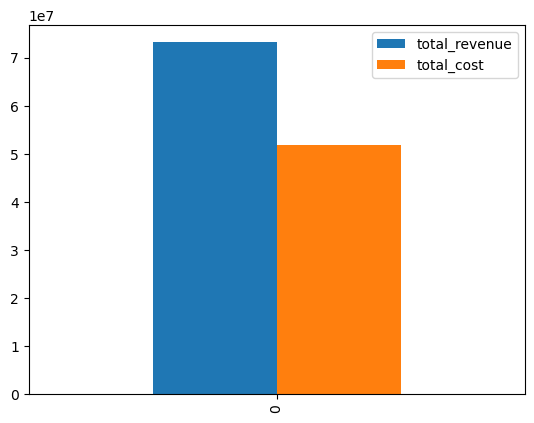

In [8]:
total_profit_df = pd.DataFrame({'total_revenue':[total_revenue], 'total_cost':[total_cost]})
total_profit_df.plot(kind='bar', sharey=True)

#### 3) Hogy alakultak az eladások az évek során? (teljesített eladásokat nézzünk)

Ezen kérdés megválaszolásához a tárolt teljesítési dátumokat kell figyelembe vennük, amit a kezelhetőség érdekében átalakítunk datetime a pandas csomag to_datetime() segítségével.

In [9]:
sales_data['DeliveryDate'] = pd.to_datetime(sales_data['DeliveryDate'], format="%m/%d/%Y") #Formátum megadásával jelentősen gyorsítható a futási idő!
sales_data.dtypes #megjelenítjük minden oszlop típusát ellenőrzés céljából!

OrderNumber                 object
Sales Channel               object
WarehouseCode               object
ProcuredDate        datetime64[ns]
OrderDate           datetime64[ns]
ShipDate            datetime64[ns]
DeliveryDate        datetime64[ns]
CurrencyCode                object
_SalesTeamID                 int64
_CustomerID                  int64
_StoreID                     int64
_ProductID                   int64
Order Quantity               int64
Discount Applied           float64
Unit Price                 float64
Unit Cost                  float64
Total Price                float64
Total Cost                 float64
dtype: object

Ezt követően az ebben tárolt évek alapján szükséges csoportosítanunk a Total Price oszlop aggregátumát.

In [10]:
pd.set_option('display.float_format', lambda x: '%.5f' % x) #scientific notation kikapcsolására, ellenkező esetben normál alakban adja meg a nagyobb számokat a pandas

yearly_revenue = pd.DataFrame(sales_data['Total Price'].groupby(sales_data['DeliveryDate'].dt.year).sum())

yearly_revenue.head()

,Total Price
DeliveryDate,
2018,15157786.87500
2019,28107916.88250
2020,28413386.80000
2021,1464289.18750


Csoportosított összegzést követően, a könnyebb értelmezés érdekében ábrázoljuk a kapott adatokat, vonaldiagram használatával!

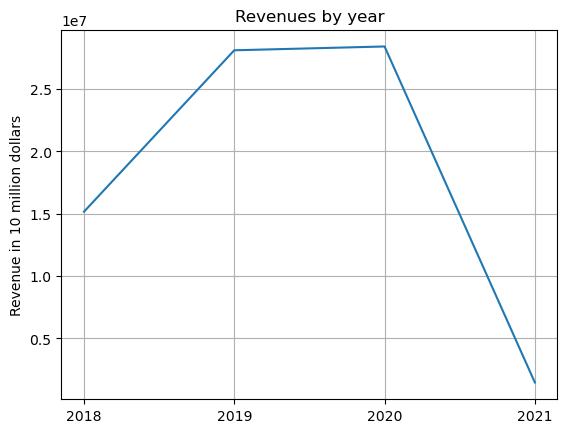

In [11]:
years = [year for year, df in sales_data.groupby(sales_data['DeliveryDate'].dt.year)]
#Mivel a groupby() csupán az aggregált értékeket tárolja az elkészített DataFrame-ben, szükséges az éveket is kinyernünk az ábrázoláshoz!
plt.plot(years, yearly_revenue["Total Price"])
plt.xticks(years)
plt.grid()
plt.ylabel('Revenue in 10 million dollars')
plt.title("Revenues by year")
plt.show()

A diagram alapján látható, hogy a legmagasabb értéket a 2020-as évi eladások hozták, illetve az is, hogy csökkenő mértékben, de növekvő tendenciát mutatnak az eladások. A 2021-es adat valószínűleg még nem teljes évre vonatkozik, így ez csupán torzító tényező lehet, de eltüntetni még semmiképp nem érdemes.

#### 4) Mennyi volt a legsikeresebb évben az átlagos forgalom havi bontásban?

Ehhez le kell szűrnünk egy újabb DataFrame-be azokat a rekordokat, amelyeket 2020-ban teljesített a vállalat.
A szűrést indexeléssel tudjuk kivitelezni, ugyanis az indexer képes logikai feltételeknek megfelelő rekordokat is visszaadni.

In [12]:
most_revenue_year_data = pd.DataFrame(sales_data[sales_data['DeliveryDate'].dt.year == 2020])
most_revenue_year_data.head(100)

,OrderNumber,Sales Channel,WarehouseCode,ProcuredDate,OrderDate,ShipDate,DeliveryDate,CurrencyCode,_SalesTeamID,_CustomerID,_StoreID,_ProductID,Order Quantity,Discount Applied,Unit Price,Unit Cost,Total Price,Total Cost
4623,SO - 0004724,In-Store,WARE-NMK1003,2019-08-23,2019-12-01,2019-12-26,2020-01-03,USD,9,43,133,44,4,0.15000,2572.80000,1132.03200,8747.52000,4528.12800
4624,SO - 0004725,Online,WARE-UHY1004,2019-08-23,2019-12-02,2019-12-29,2020-01-04,USD,15,26,260,13,5,0.05000,1065.30000,585.91500,5060.17500,2929.57500
4625,SO - 0004726,Online,WARE-NMK1003,2019-08-23,2019-12-02,2019-12-29,2020-01-02,USD,18,38,169,18,1,0.05000,2298.10000,1884.44200,2183.19500,1884.44200
4628,SO - 0004729,Online,WARE-NBV1002,2019-08-23,2019-12-02,2019-12-25,2020-01-01,USD,15,30,87,44,4,0.40000,1098.80000,472.48400,2637.12000,1889.93600
4630,SO - 0004731,Online,WARE-XYS1001,2019-08-23,2019-12-02,2019-12-30,2020-01-09,USD,19,47,2,3,7,0.05000,2532.60000,1696.84200,16841.79000,11877.89400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,SO - 0004901,Wholesale,WARE-NMK1003,2019-08-23,2019-12-24,2020-01-13,2020-01-16,USD,27,39,128,13,7,0.07500,254.60000,188.40400,1648.53500,1318.82800
4801,SO - 0004902,Wholesale,WARE-PUJ1005,2019-08-23,2019-12-24,2020-01-03,2020-01-10,USD,26,35,326,28,2,0.07500,1983.20000,1665.88800,3668.92000,3331.77600
4802,SO - 0004903,In-Store,WARE-UHY1004,2019-08-23,2019-12-24,2020-01-10,2020-01-14,USD,11,6,254,45,6,0.15000,1098.80000,791.13600,5603.88000,4746.81600
4803,SO - 0004904,In-Store,WARE-NMK1003,2019-08-23,2019-12-24,2019-12-27,2020-01-01,USD,10,12,166,28,4,0.15000,1286.40000,514.56000,4373.76000,2058.24000


A havi bontás eléréséhez a delivery date oszloipot kell csoportosítanunk, majd ezekből, a fentiekhez hasonlóan képezzük az aggregátumot, ami jelen esetben az átlagolást jelenti.

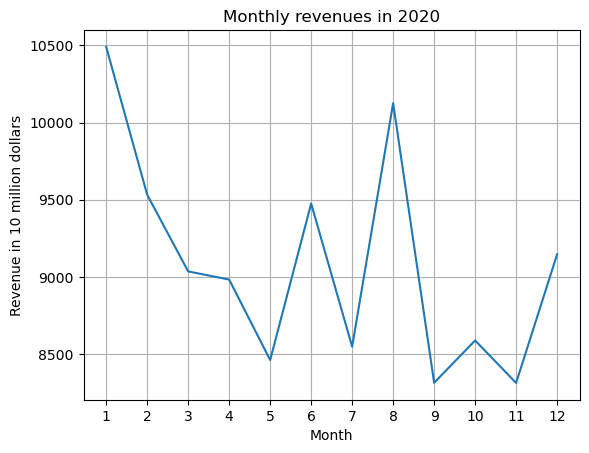

In [13]:
monthly_revenue = pd.DataFrame(most_revenue_year_data['Total Price'].groupby(most_revenue_year_data['DeliveryDate'].dt.month).mean())

months = [month for month, df in most_revenue_year_data.groupby(most_revenue_year_data['DeliveryDate'].dt.month)]
plt.plot(months, monthly_revenue['Total Price'])
plt.xticks(months)
plt.xlabel('Month')
plt.grid()
plt.ylabel('Revenue in 10 million dollars')
plt.title("Monthly revenues in 2020")
plt.show()

A diagram alapján látható, hogy januárban volt a legerősebb az eladások száma, majd ezután csökkenő ütemet vett fel. A nyár kezdetekor, illetve iskolakezdés előtt volt egy-egy közel csúcspontja az eladásoknak.

#### 5) A 2020-as üzleti évben mely Sales csoport hozta a legnagyobb bevételt?

Ehhez ismét egy hasonló csoportosítást kell végeznünk, mint az előbb, ugyanakkor SalesTeamID-k alapján kell a csoportosítást elvégeznünk. Majd a Sales csoportok neveinek kiírásához szükségünk lesz egy másik adathalmaz adataira, amely a Sales csoportokkal foglalkozik.

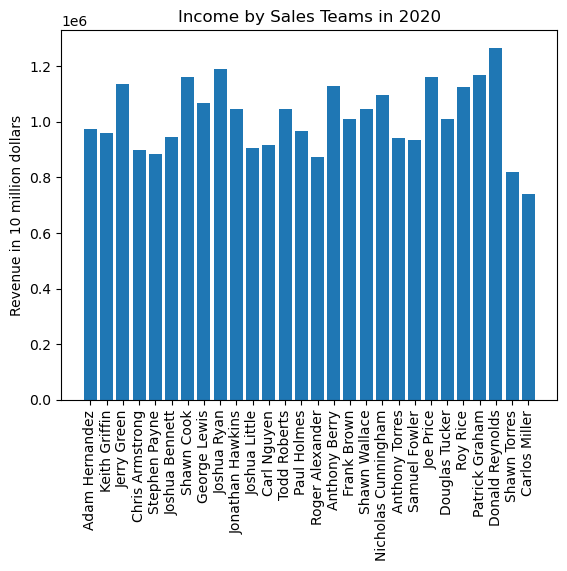

In [14]:
revenue_by_sales_teams = pd.DataFrame(most_revenue_year_data['Total Price'].groupby(most_revenue_year_data['_SalesTeamID']).sum())

#Sales team adatok beolvasása
sales_team_data = pd.read_excel("./Sample/US_Regional_Sales_Data.xlsx", sheet_name=5)
sales_teams = sales_team_data['Sales Team']

plt.bar(sales_teams, revenue_by_sales_teams['Total Price'])
plt.xticks(sales_teams, rotation=90)
plt.ylabel('Revenue in 10 million dollars')
plt.title("Income by Sales Teams in 2020")
plt.show()

A grafikonból megállapítható, hogy közel azonos teljesítménnyel bírtak a különböző eladási csoportok, a legmagasabb eladási értéket Donald Reynolds-hoz köthetjük a 2020-as üzleti évben.

#### 6) Mely raktárból adtunk el a legmagasabb haszonkulccsal?

A feladat megoldásához ismét csoportokba kell rendeznünk a mindenkori rekordokat, ugyanakkor itt a profit szerint kell majd a csoportok értékeit megvizsgálni! Legmagasabb haszonkulcsot akár az átlagos profit mértékével is vizsgálhatjuk!
Mint fentebb taglaltam a profitot a TProfit = TR - TC képlettel vizsgáljuk!

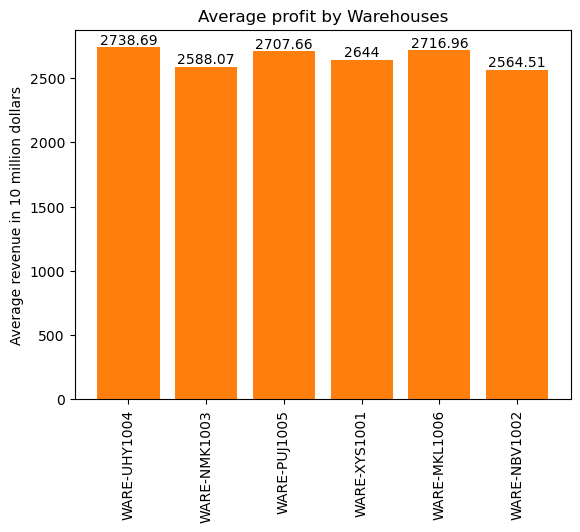

In [15]:
sales_data['Total Profit'] = sales_data['Total Price'] - sales_data['Total Cost']

avg_sales_by_warehouses = pd.DataFrame((sales_data['Total Profit']).groupby(sales_data['WarehouseCode']).mean())

warehouses = sales_data['WarehouseCode'].unique() #Mivel nincs külön reláció a Warehouse-oknak, így kigyűjtöm a központi eladásokat jegyző táblából az összes különböző raktárkódot.

plt.bar(warehouses, avg_sales_by_warehouses['Total Profit'])
plt.xticks(warehouses, rotation=90)
plt.bar_label(plt.bar(warehouses, avg_sales_by_warehouses['Total Profit']))
plt.ylabel('Average revenue in 10 million dollars')
plt.title("Average profit by Warehouses")
plt.show()

Látható, hogy a profitokat átlagolva a legmagasabb átlaggal a WARE-UHY1004-es raktárból adtunk el. Ugyanakkor az is látható, hogy a profitátlagok között a különbség marginális, ami arra enged következtetni, hogy a vállalat raktárai körülbelül egyenlő kihasználtsággal rendelkeznek az eladások szemponjából.

#### 7) Mely megrendelőink rendeltek tőlünk az átlagos megrendelési összeg felett?

A megoldáshoz kettő adathalmazra lesz szükség. Az első a vevőkódok szerinti csoportosított adatok összegzése, majd ebből alkotnunk kell egy átlagot is, ami az összegzett csoportok átlagát fogja megadni.
Ezen kívül szükséges lesz a megrendelők adatait egy másik munkafüzetből beolvasnunk, hogy meg tudjuk jeleníteni a envüket is.

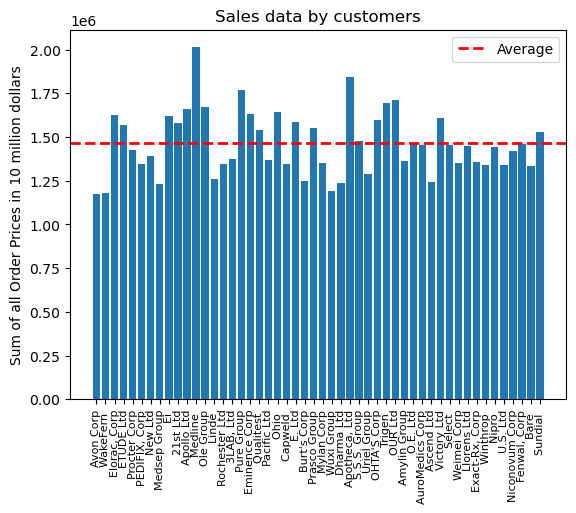

In [16]:
sales_by_customers = pd.DataFrame(sales_data['Total Price'].groupby(sales_data['_CustomerID']).sum())
avg_order_revenue = sales_by_customers['Total Price'].mean()

customers_data = pd.read_excel("./Sample/US_Regional_Sales_Data.xlsx", sheet_name=1)
customers = customers_data['Customer Names']

plt.bar(customers, sales_by_customers['Total Price'])
plt.xticks(customers, rotation=90, size=8)
plt.axhline(avg_order_revenue, linewidth=2, color='r', linestyle='--', label='Average')
plt.ylabel('Sum of all Order Prices in 10 million dollars')
plt.title("Sales data by customers")
plt.legend()

plt.show()

Az ábráról leolvasható, hogy mely megrendelőink rendeltek az átlagos rendelési árak felett. Kiemelendő közülük a Mediline vállalat, amely a legmagasabb értékben rendelt az elemzett vállalattól.

#### 8) Mely termék(ek) volt a legtöbbet eladott(ak) az egyes években?

A célunk, hogy évek és productID-k szerint csoportosítsük a teljes eladási adathalmazt. Ezután ezeket összegezzük, és minden év esetén kiválasszuk belőlük a maximum értékeket.

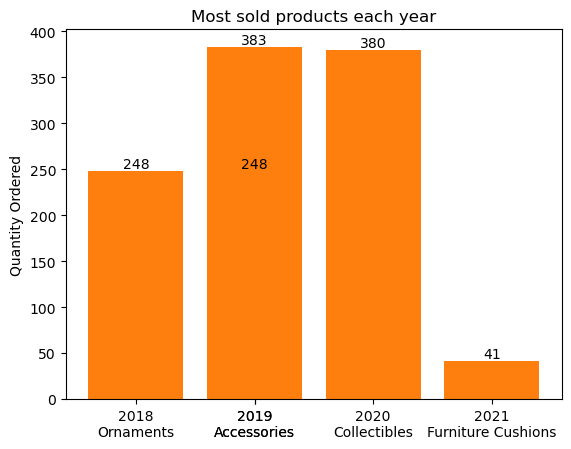

In [30]:
sales_data['DeliveryYear'] = sales_data['DeliveryDate'].dt.year

#product_temp = sales_data[['DeliveryYear', 'Order Quantity', '_ProductID']]
#product_temp.head()
products_each_year = pd.DataFrame(sales_data.groupby(['_ProductID', 'DeliveryYear'])['Order Quantity'].sum().reset_index())
#reset_index() használatával azon mezőket is megtarthatjuk, amelyek által csoportosítottunk!
#max_by_product = pd.DataFrame(products_each_year.groupby(['_ProductID'])['Order Quantity'].max().reset_index())
max_by_year = pd.DataFrame(products_each_year.groupby(['DeliveryYear'])['Order Quantity'].max().reset_index())
merged = pd.merge(products_each_year, max_by_year, how='inner', on=['Order Quantity', 'Order Quantity'])
#merge(): Két DataFrame-et képes összekapcsolni, az első paraméter a bal, a második a jobb reláció az összekapcsoláshoz. SQL-es JOIN módszerek alapján (how paraméter). Az on paraméter megadja a kapcsolómezőket a bal és jobb DataFrame-ből.

products_data = pd.read_excel("./Sample/US_Regional_Sales_Data.xlsx", sheet_name=3)

merged['Product'] = pd.merge(merged, products_data, how="inner", on=['_ProductID', '_ProductID'])['Product Name']
merged.head()
merged["Label"] = merged['DeliveryYear_x'].astype(str) +"\n"+ merged["Product"].astype(str)


plt.bar(merged['DeliveryYear_x'], merged['Order Quantity'])
plt.xticks(merged['DeliveryYear_x'], merged['Label'])
plt.bar_label(plt.bar(merged['DeliveryYear_x'], merged['Order Quantity']))
plt.ylabel('Quantity Ordered')
plt.title("Most sold products each year")
plt.show()